# Heart Disease Machine Learning Model

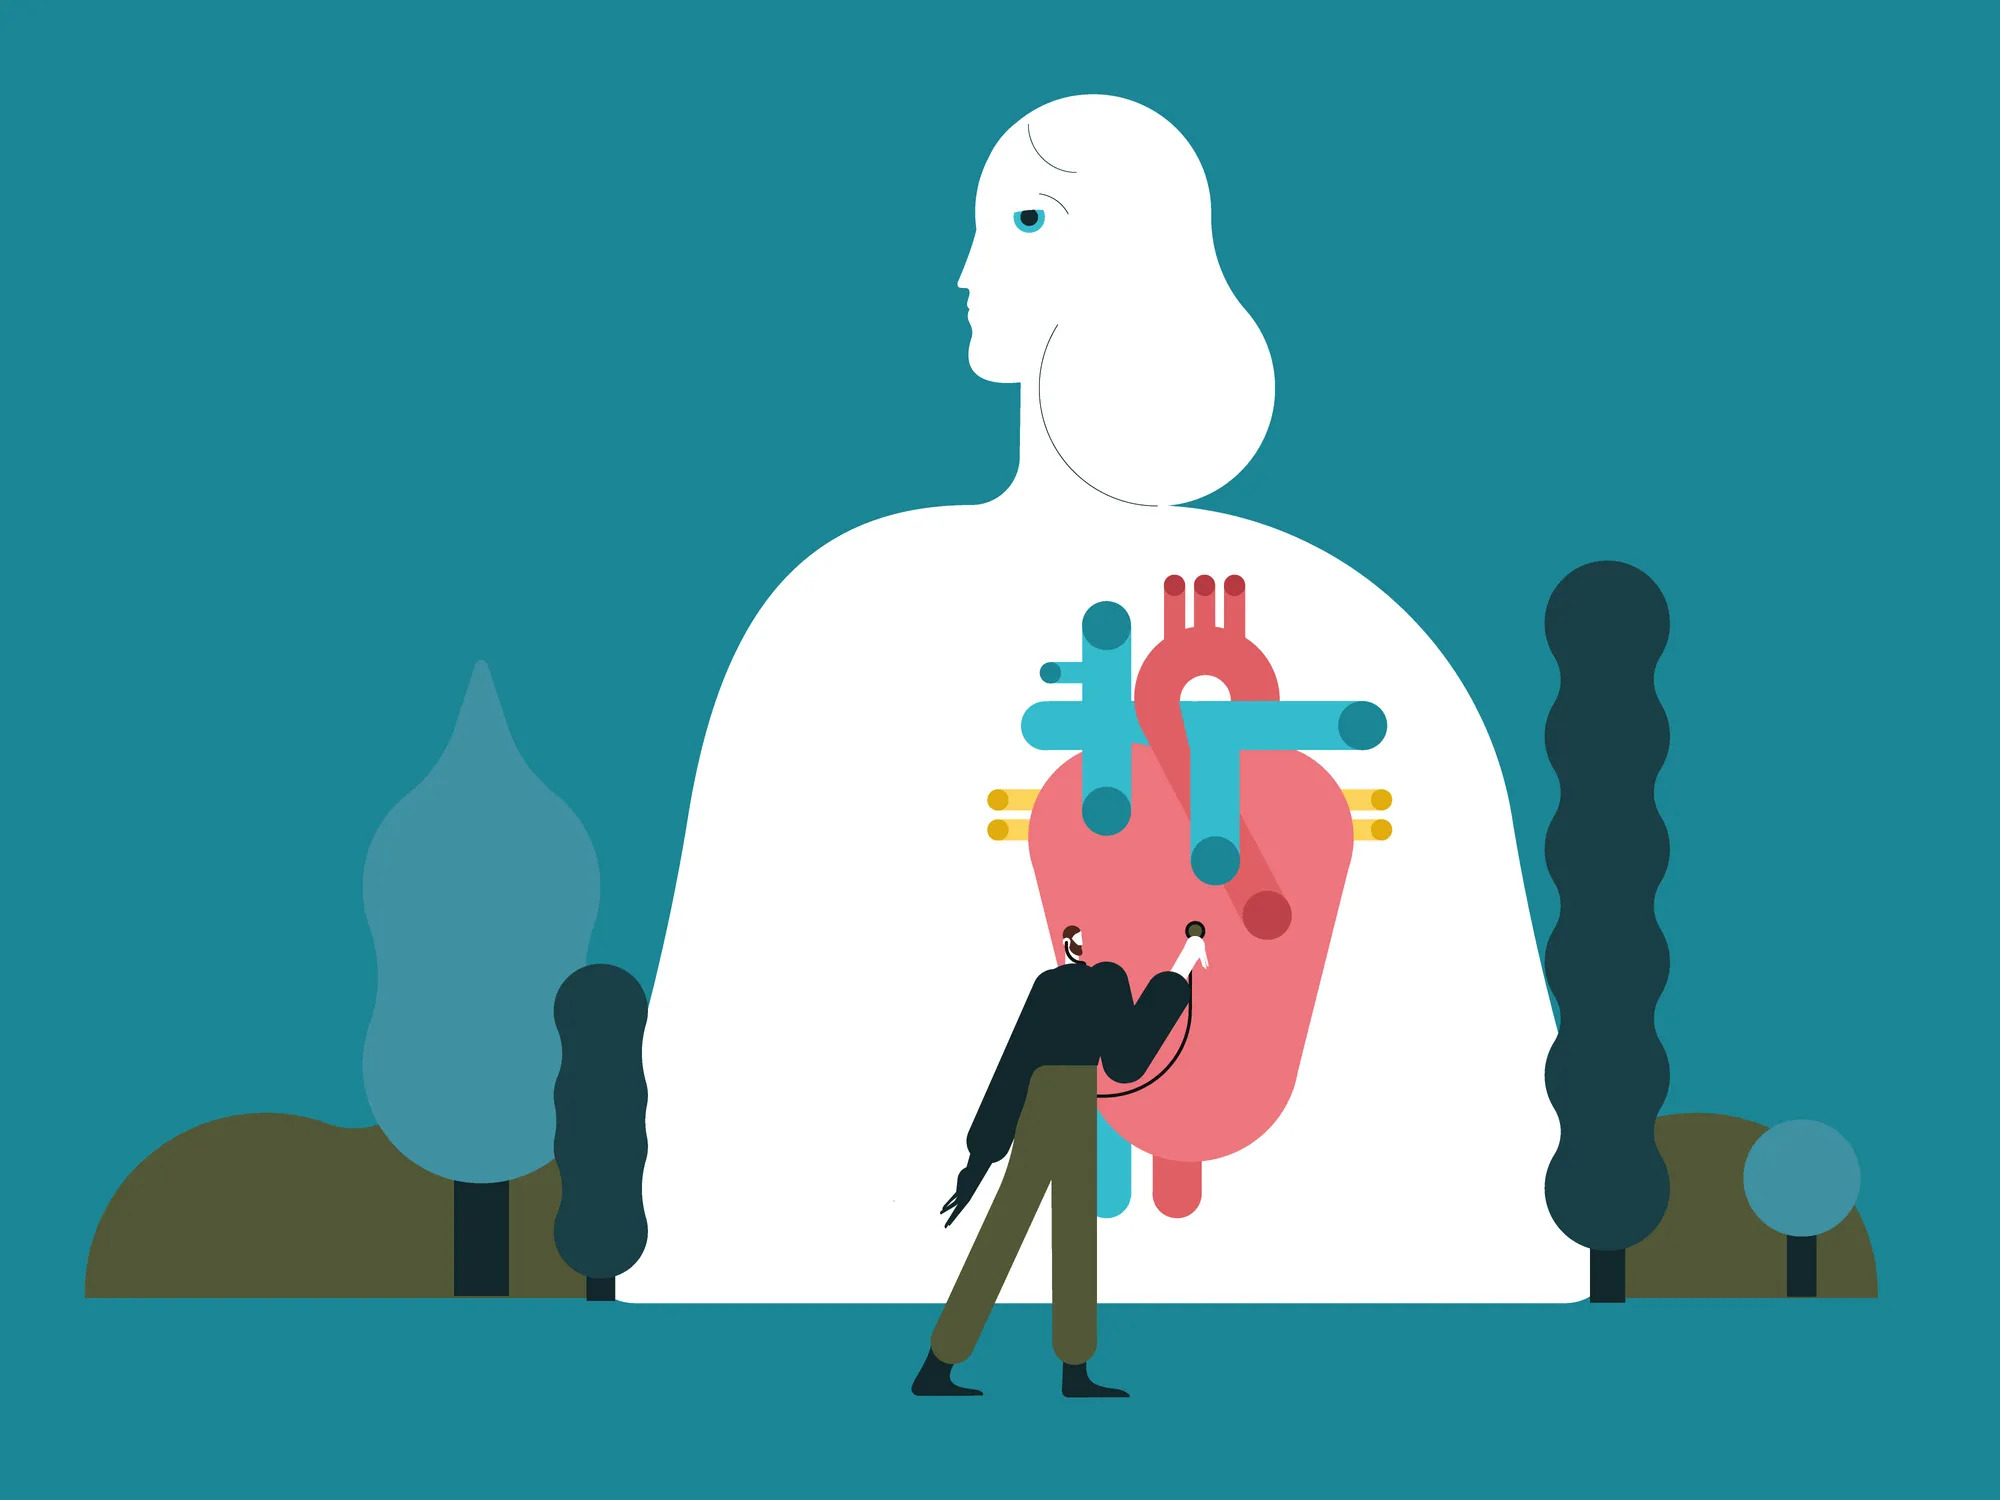

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

## Key for Data 

age: The person’s age in years

sex: The person’s sex (1 = male, 0 = female)

cp: chest pain type
( Value 0: asymptomatic
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: typical angina )

trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)

chol: The person’s cholesterol measurement in mg/dl

fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: resting electrocardiographic results
( Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
Value 1: normal
Value 2: having ST-T wave abnormality )

thalach: The person’s maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment ( 0: downsloping; 1: flat; 2: upsloping )

ca: The number of major vessels (0–3)

thal: A blood disorder called thalassemia
( Value 1: fixed defect
Value 2: normal blood flow
Value 3: reversible defect )

target: Heart disease (0 = no, 1 = yes)

## Processing and Inspecting the Data

In [2]:
heart_data = pd.read_csv('..../heart_disease_data.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_data.shape

(303, 14)

In [6]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Distributions

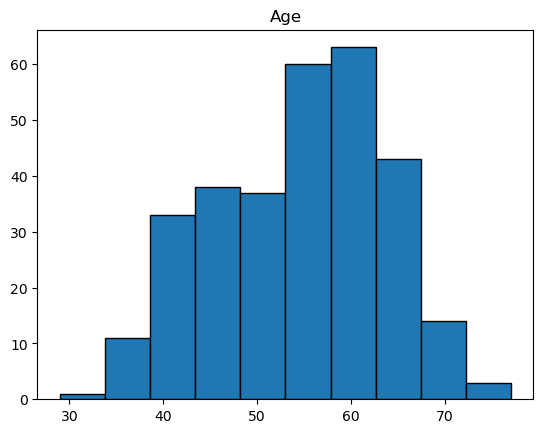

In [10]:
plt.hist(heart_data['age'], edgecolor = 'black')
plt.title('Age')

plt.show()

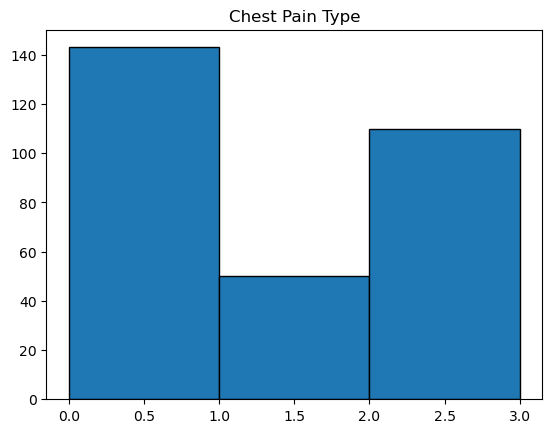

In [11]:
plt.hist(heart_data['cp'], bins = [0, 1, 2, 3], edgecolor = 'black')
plt.title('Chest Pain Type')

plt.show()

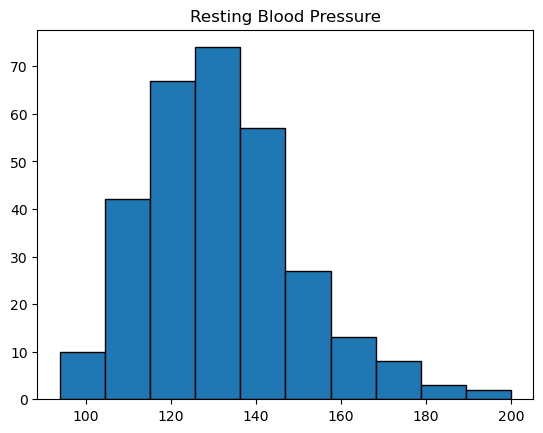

In [12]:
plt.hist(heart_data['trestbps'], edgecolor = 'black')
plt.title('Resting Blood Pressure')

plt.show()

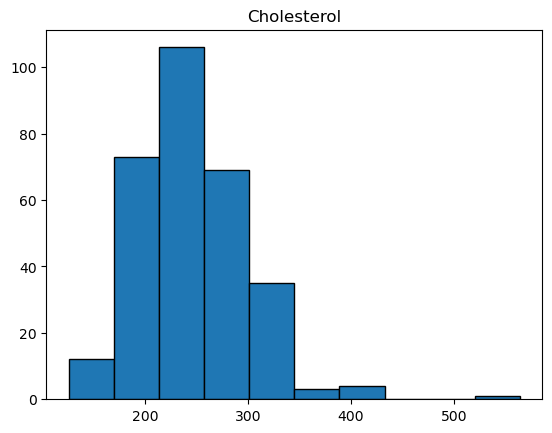

In [13]:
plt.hist(heart_data['chol'], edgecolor = 'black')
plt.title('Cholesterol')

plt.show()

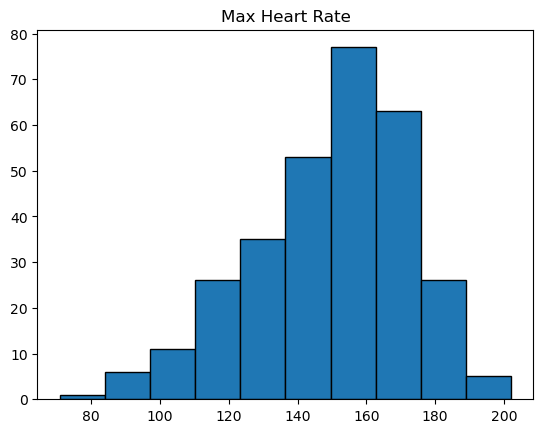

In [14]:
plt.hist(heart_data['thalach'], edgecolor = 'black')
plt.title('Max Heart Rate')

plt.show()

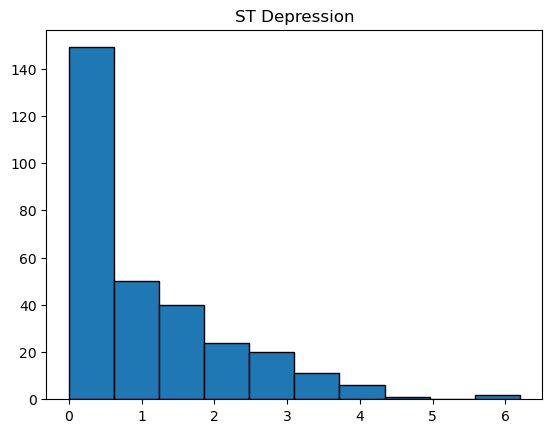

In [15]:
plt.hist(heart_data['oldpeak'], edgecolor = 'black')
plt.title('ST Depression')

plt.show()

## Data Visualizations

### Pie Graph

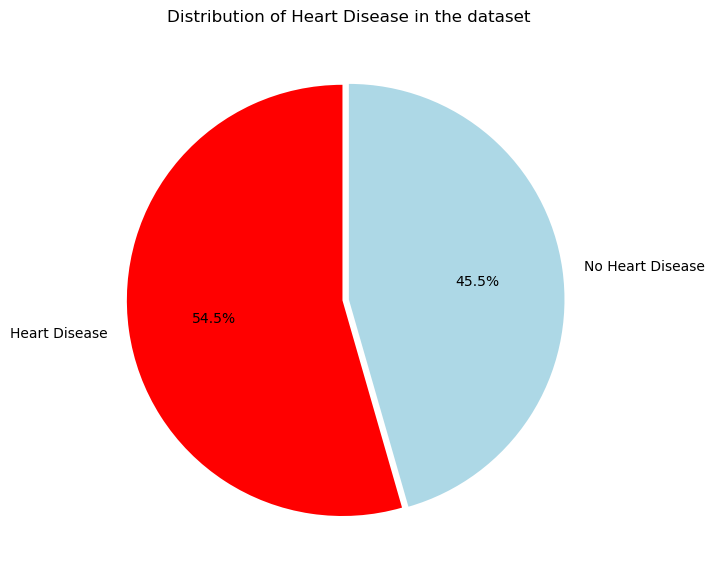

In [16]:
# Filter the DataFrame based on the 'target' column
heart_data_positive = heart_data[heart_data['target'] == 1]

# Now, you can calculate the count for your pie chart
positive_count = len(heart_data_positive)
negative_count = len(heart_data) - positive_count

labels = ['Heart Disease', 'No Heart Disease']
sizes = [positive_count, negative_count]

colors = ["red", "lightblue"]
explode = (0.03, 0)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Heart Disease in the dataset')
plt.show()


### Correlation Graph

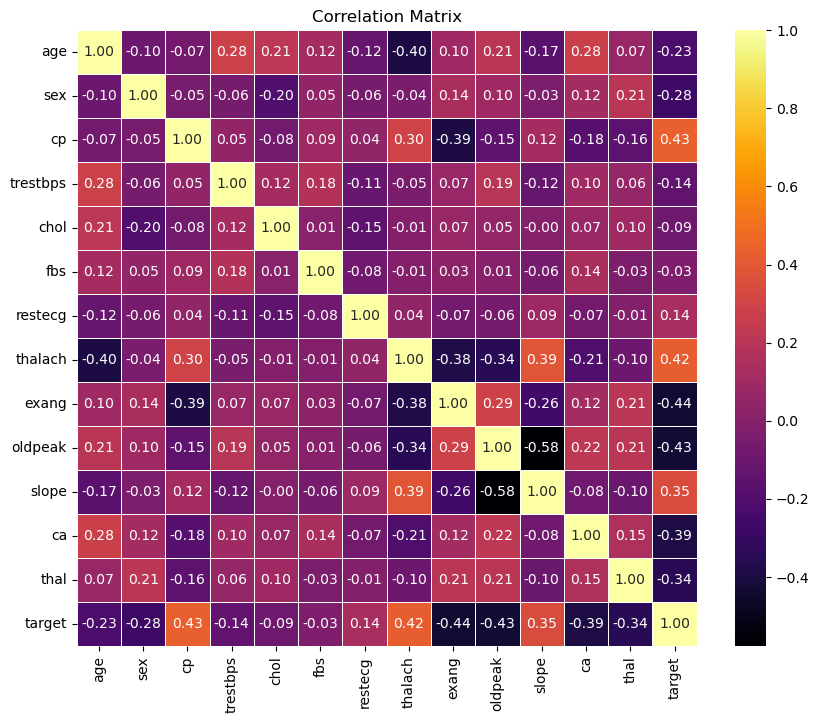

In [17]:
import seaborn as sns

correlation_matrix = heart_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Scatter Plot

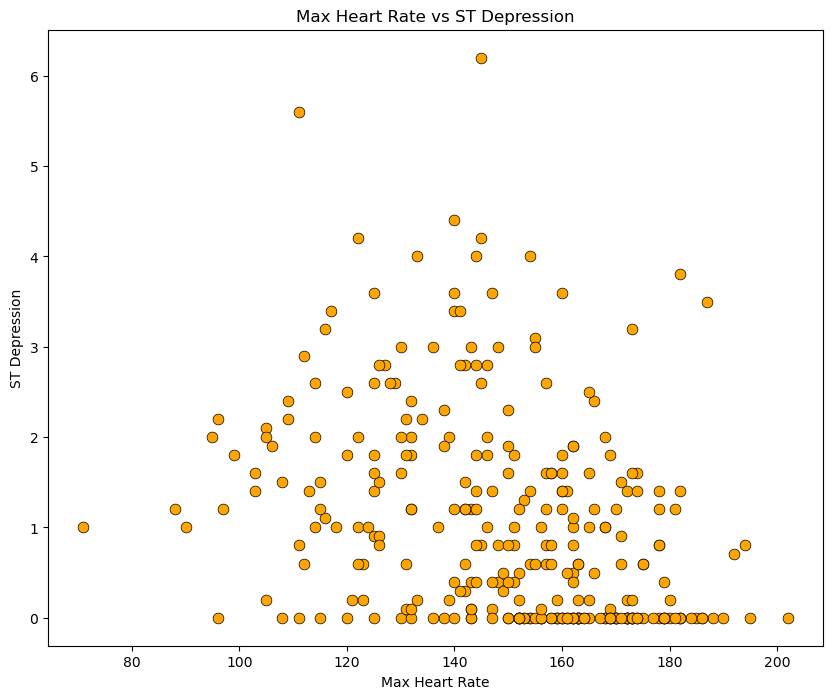

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(heart_data['thalach'],heart_data['oldpeak'], s=60, c = 'orange', edgecolor = 'black', linewidth = 0.5, alpha = 1)
plt.xlabel('Max Heart Rate')
plt.ylabel('ST Depression')
plt.title('Max Heart Rate vs ST Depression')

plt.show()

### Swarmplot

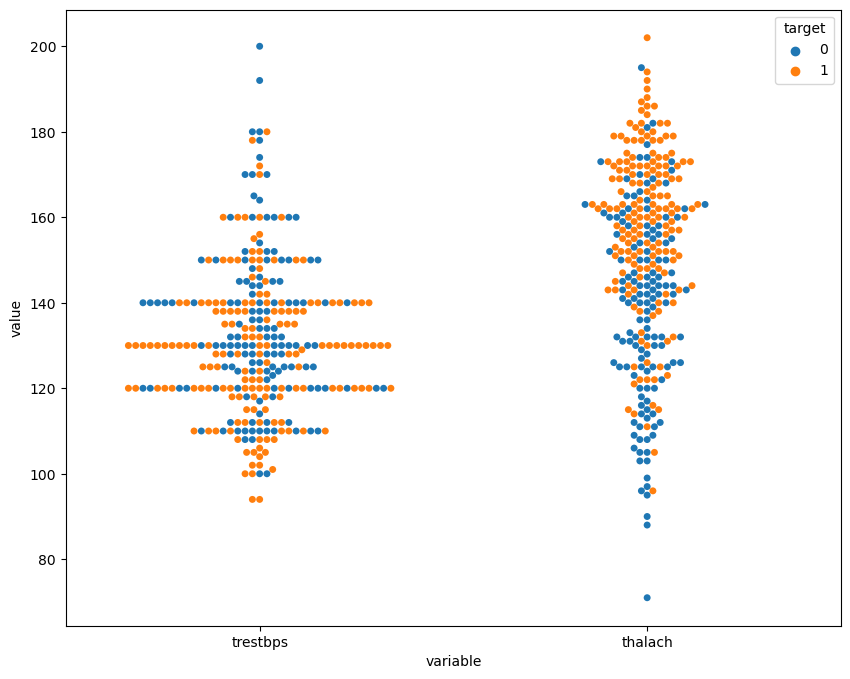

In [19]:
melted_data = pd.melt(heart_data, id_vars='target', value_vars=['trestbps','thalach'])

plt.figure(figsize=(10, 8))
sns.swarmplot(x='variable', y='value', hue='target', data=melted_data, size=5)

plt.show()

## Data Analysis

In [20]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
heart_data_positive = heart_data[heart_data['target'] == 1]

heart_data_positive

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [22]:
heart_data_negative = heart_data[heart_data['target'] == 0]

heart_data_negative

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Average resting blood pressure of patients

The average resting blood pressure of a patient with a heart disease is 129.3030303030303
The average resting blood pressure of a patient with no heart disease is 134.3985507246377


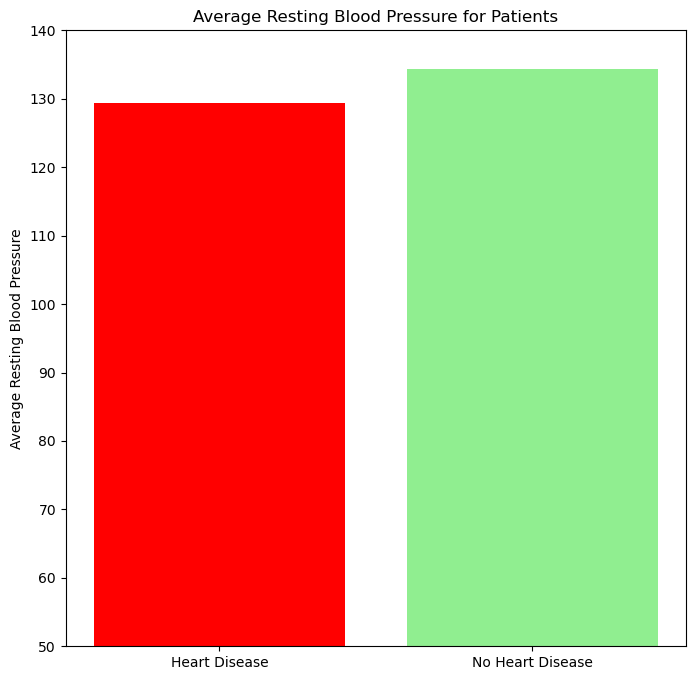

In [23]:
bps_avg_pos = heart_data_positive['trestbps'].mean()
bps_avg_neg = heart_data_negative['trestbps'].mean()

print(f'The average resting blood pressure of a patient with a heart disease is', bps_avg_pos)
print(f'The average resting blood pressure of a patient with no heart disease is', bps_avg_neg)

labels = ['Heart Disease', 'No Heart Disease']
average_bps = [bps_avg_pos, bps_avg_neg]

plt.figure(figsize=(8, 8))
plt.bar(labels, average_bps, color=['red', 'lightgreen'])
plt.ylabel('Average Resting Blood Pressure')
plt.title('Average Resting Blood Pressure for Patients')
plt.ylim(50, 140)

plt.show()

#### Number of patients with heart disease per gender

Number of Female Patients: 96
Number of Male Patients: 207


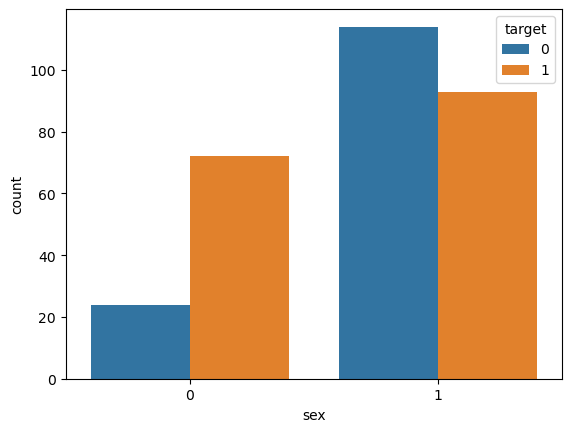

In [24]:
sns.countplot(x="sex", data=heart_data,hue='target')
male, fm = heart_data['sex'].value_counts()

print('Number of Female Patients:', fm)
print('Number of Male Patients:', male)

#### Median Cholesterol per Gender

The most common cholesterol level for a man with a heart disease is  228.0
The most common cholesterol level for a woman with a heart disease is  249.0


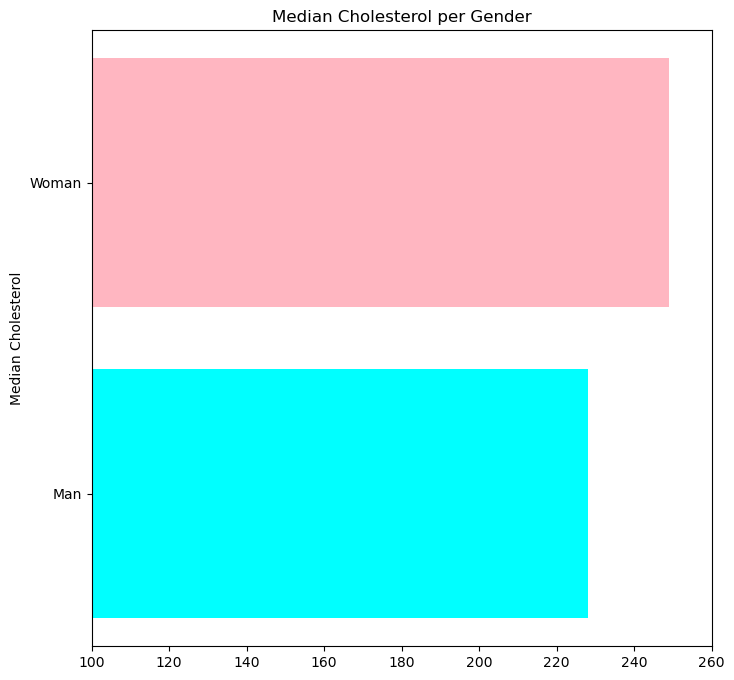

In [25]:
heart_data_positive_man = heart_data_positive[heart_data_positive['sex'] == 1]
heart_data_positive_woman = heart_data_positive[heart_data_positive['sex'] == 0]

chol_heart_positive_man = heart_data_positive_man['chol'].median()
chol_heart_positive_woman = heart_data_positive_woman['chol'].median()

print(f'The most common cholesterol level for a man with a heart disease is ', chol_heart_positive_man)
print(f'The most common cholesterol level for a woman with a heart disease is ', chol_heart_positive_woman)

labels = ['Man', 'Woman']
median_chol = [chol_heart_positive_man, chol_heart_positive_woman]

plt.figure(figsize=(8, 8))
plt.barh(labels, median_chol, color=['cyan', 'lightpink'])
plt.ylabel('Median Cholesterol')
plt.title('Median Cholesterol per Gender')
plt.xlim(100, 260)

plt.show()

The average chest pain type of a patient with a heart disease is 1.3757575757575757
The average chest pain type of a patient with no heart disease is 0.4782608695652174


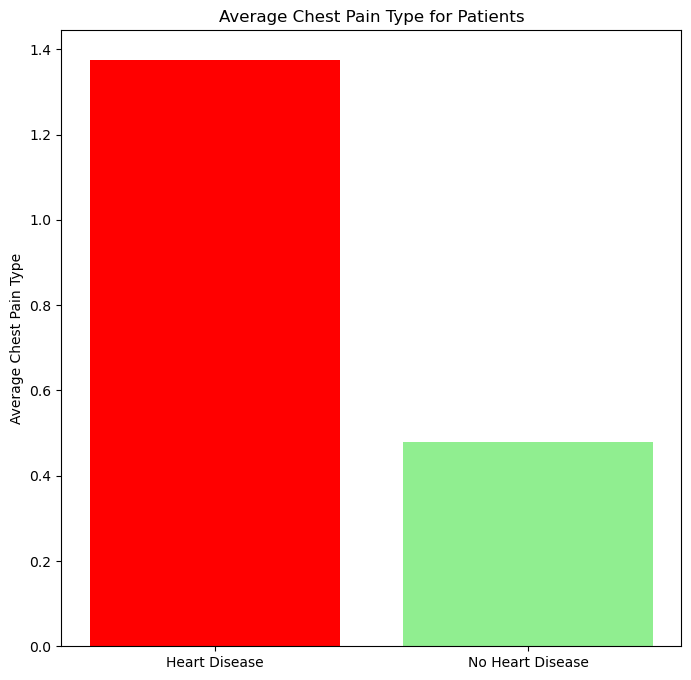

In [26]:
cp_avg_pos = heart_data_positive['cp'].mean()
cp_avg_neg = heart_data_negative['cp'].mean()

print(f'The average chest pain type of a patient with a heart disease is', cp_avg_pos)
print(f'The average chest pain type of a patient with no heart disease is', cp_avg_neg)

labels = ['Heart Disease', 'No Heart Disease']
average_cp = [cp_avg_pos, cp_avg_neg]

plt.figure(figsize=(8, 8))
plt.bar(labels, average_cp, color=['red', 'lightgreen'])
plt.ylabel('Average Chest Pain Type')
plt.title('Average Chest Pain Type for Patients')

plt.show()

## Machine Learning Model

#### Setting Feature and Target

In [27]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [28]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

#### Setting Data Test and Training

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, stratify=Y, random_state=2)

In [31]:
X.shape, X_train.shape, X_test.shape

((303, 13), (196, 13), (107, 13))

#### Logistic Regression

In [32]:
model = LogisticRegression(max_iter=100000)

In [33]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=100000)

#### Accuracy Test

In [34]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print(f'Training data accuracy:', training_data_accuracy)

Training data accuracy: 0.8673469387755102


In [35]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print(f'Test data accuracy:', test_data_accuracy)

Test data accuracy: 0.8411214953271028


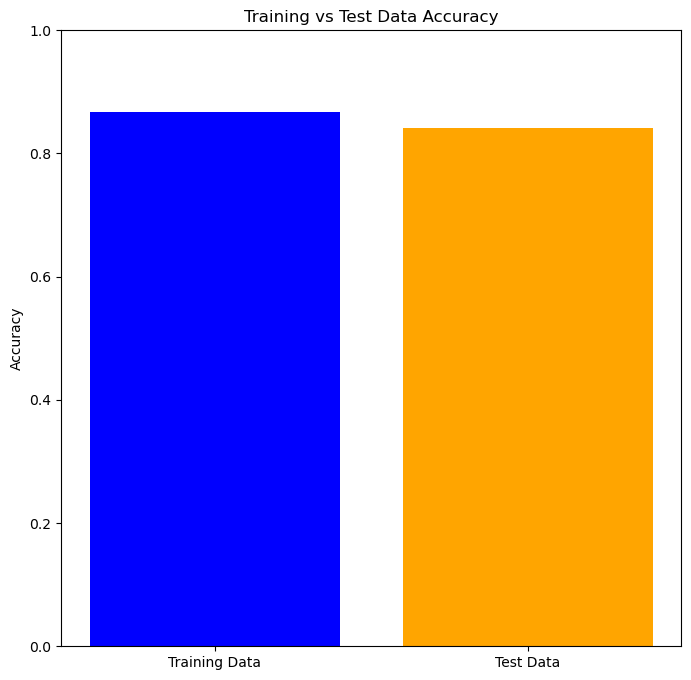

In [36]:
labels = ['Training Data', 'Test Data']
accuracies = [training_data_accuracy, test_data_accuracy]

plt.figure(figsize=(8,8))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Training vs Test Data Accuracy')
plt.ylim(0, 1)

plt.show()

#### Prediction Model

In [37]:
input_data = np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
input_data_df = pd.DataFrame(input_data, columns=feature_names)

prediction = model.predict(input_data_df)
print(prediction)

if (prediction[0] == 0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [38]:
heart_data_positive.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [39]:
input_data = np.array([[67,1,0,160,286,0,0,108,1,1.5,1,3,2]])

feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
input_data_df = pd.DataFrame(input_data, columns=feature_names)

prediction = model.predict(input_data_df)
print(prediction)

if (prediction[0] == 0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [40]:
heart_data_negative.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
